# Copy the notebook from ../KW_stage_IV, modify the galaxy source file for stage-III. --09/19/2018
#---------------------------------
# Generate lensing efficiency function in terms of redshift for cases with different number of tomographic bins. The output would be used for Cijl and Gm calculation. --09/12/2018

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import sys, os

In [3]:
sys.path.append("/Users/ding/Documents/playground/shear_ps/SVD_ps/")
import cosmic_params
sys.path.append("/Users/ding/Documents/playground/shear_ps/SVD_ps/KW_modules/")
sys.path.append("/Users/ding/Documents/playground/shear_ps/SVD_ps/common_modules/")

In [4]:
from lens_eff_module import lens_eff
from module_market import dis_fun, comove_d

In [5]:
# get redshift range from n(z) file
idir0 = '/Users/ding/Documents/playground/shear_ps/SVD_ps/'
inputf = idir0 + 'Input_files/zdistribution_DES_Tully_Fisher.txt'             # Input file of n(z) which is the galaxy number density distribution in terms of z
# Here center_z denotes z axis of n(z). It may not be appropriate since we don't have redshift bin setting
lower_z, center_z, upper_z, n_z = np.loadtxt(inputf, dtype='f8', comments='#', unpack=True)

In [6]:
center_z

array([0.00216667, 0.0065    , 0.01083333, 0.01516667, 0.0195    ,
       0.02383333, 0.02816667, 0.0325    , 0.03683333, 0.04116667,
       0.0455    , 0.04983333, 0.05416667, 0.0585    , 0.06283333,
       0.06716667, 0.0715    , 0.07583333, 0.08016667, 0.0845    ,
       0.08883333, 0.09316667, 0.0975    , 0.1018333 , 0.1061667 ,
       0.1105    , 0.1148333 , 0.1191667 , 0.1235    , 0.1278333 ,
       0.1321667 , 0.1365    , 0.1408333 , 0.1451667 , 0.1495    ,
       0.1538333 , 0.1581667 , 0.1625    , 0.1668333 , 0.1711667 ,
       0.1755    , 0.1798333 , 0.1841667 , 0.1885    , 0.1928333 ,
       0.1971667 , 0.2015    , 0.2058333 , 0.2101667 , 0.2145    ,
       0.2188333 , 0.2231667 , 0.2275    , 0.2318333 , 0.2361667 ,
       0.2405    , 0.2448333 , 0.2491667 , 0.2535    , 0.2578333 ,
       0.2621667 , 0.2665    , 0.2708333 , 0.2751667 , 0.2795    ,
       0.2838333 , 0.2881667 , 0.2925    , 0.2968333 , 0.3011667 ,
       0.3055    , 0.3098333 , 0.3141667 , 0.3185    , 0.32283

In [7]:
z_array = np.linspace(0.0, upper_z[-1], 2000)

In [8]:
help(comove_d)

Help on function comove_d in module module_market:

comove_d(z)
    # without c/H_0 constant



In [9]:
c = 2.99792458e5                        # speed of light unit in km/s
H_0 = 100                               # reduced Hubble constant, unit in h km/s/Mpc

In [10]:
chi_array = np.array([], dtype=np.float64)
for z in z_array:
    chi_z = comove_d(z)                 # without c/H_0 constant in chi_z
    chi_array = np.append(chi_array, chi_z)   

In [11]:
nrbin = 100             # number of tomographic bins, change it case by case 

In [12]:
z_min = center_z[0]   # not use lower_z[0] which is 0, otherwise, it gives NaN in lensing efficiency g_i 
z_max = upper_z[-1]             
zbin_avg = (z_max-z_min)/float(nrbin)
zbin = np.zeros(nrbin + 1)
for i in range(nrbin):
    zbin[i]=i*zbin_avg + z_min
zbin[-1]= z_max

In [13]:
chibin = np.zeros(nrbin+1)
for i in range(0, nrbin+1):
    chibin[i] = comove_d(zbin[i])

In [14]:
g_i_matrix = np.array([], dtype=np.float64).reshape(0, len(chi_array))  # each row stores g_i for a given tomographic bins id
for i in range(nrbin):
    j = 0
    g_i = np.zeros(len(chi_array))
    for chi in chi_array:
        if chi < chibin[i+1]:
            g_i[j] = lens_eff(i, chi, chibin)
        j += 1
    g_i_matrix = np.vstack((g_i_matrix, g_i))

In [15]:
g_i

array([1.00000000e+00, 9.99293333e-01, 9.98586879e-01, ...,
       3.34369184e-05, 8.35530524e-06, 0.00000000e+00])

In [16]:
chi_array

array([0.00000000e+00, 6.50227613e-04, 1.30026007e-03, ...,
       9.22611776e-01, 9.22920787e-01, 9.23229687e-01])

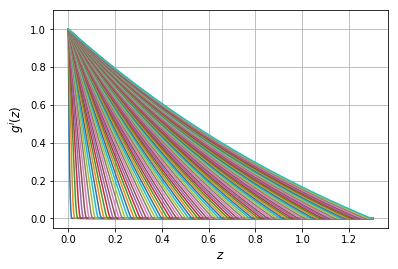

In [17]:
for i in range(nrbin):
    plt.plot(z_array, g_i_matrix[i, :])
plt.ylim(-0.05, 1.1)
plt.xlabel(r'$z$', fontsize=12)
plt.ylabel(r'$g^i(z)$', fontsize=12)
plt.grid(True)

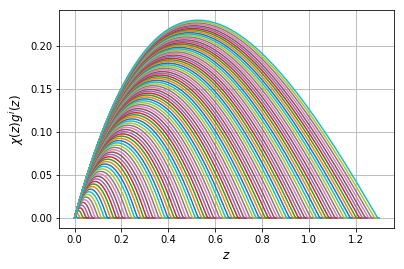

In [18]:
for i in range(nrbin):
    plt.plot(z_array, chi_array*g_i_matrix[i, :])
plt.xlabel(r'$z$', fontsize=12)
plt.ylabel(r'$\chi(z)g^i(z)$', fontsize=12)
plt.grid(True)

In [19]:
odir = './lens_eff_g_i/'
if not os.path.exists(odir):
    os.makedirs(odir)
filename = 'g_i_{}rbins.npz'.format(nrbin)
ofile = odir + filename
np.savez_compressed(ofile, z_array=z_array, chi_array = chi_array, g_i_matrix=g_i_matrix)